### Perform Hierarchical Clustering

Visualise which stations cluster together based on their venue types.

### Import Libraries

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler # normalize dataset

import scipy # scipy clustering
import pylab # scipy clustering
from scipy.cluster import hierarchy # scipy clustering
from scipy.cluster.hierarchy import fcluster

from scipy.spatial import distance_matrix # SCIKIT cluster

import matplotlib.cm as cm # SCITKIT visualize

from scipy import ndimage



from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets.samples_generator import make_blobs




print('Libraries imported.')

Libraries imported.


### Load Dataset

In [36]:
Stations_VenueCounts = pd.read_csv('Stations_VenueCounts_Percent.csv', index_col = 0)
print(Stations_VenueCounts.head())

            Arts & Entertainment  College & University  Food  Nightlife Spot  \
Blair                        1.0                   1.0  27.0             1.0   
Cyrville                     2.0                   0.0   9.0             2.0   
St-Laurent                   2.0                   1.0  19.0             0.0   
Tremblay                     2.0                   1.0  20.0             0.0   
Hurdman                      2.0                  11.0  15.0             3.0   

            Outdoors & Recreation  Professional & Other Places  \
Blair                         4.0                         20.0   
Cyrville                      2.0                         33.0   
St-Laurent                    1.0                          4.0   
Tremblay                      5.0                         16.0   
Hurdman                      14.0                         16.0   

            Shop & Service  Travel & Transport  
Blair                 36.0                10.0  
Cyrville              40

### Hierarchical Cluster Analysis

Distance Matrix

In [37]:
data_000 = Stations_VenueCounts

dist_matrix = distance_matrix(data_000, data_000)

dist_matrix[0:2]

array([[ 0.        , 22.8035085 , 42.20189569, 24.2693222 , 32.10918872,
        32.41913015, 73.37574531, 29.12043956, 38.88444419, 25.03996805,
        15.71623365, 34.3220046 ,  8.24621125, 12.04159458, 15.74801575,
        19.92485885, 31.8747549 , 32.29551052, 37.62977544, 33.92639091,
        33.49626845, 37.28270376, 46.17358552, 38.82009789, 36.49657518,
        31.04834939],
       [22.8035085 ,  0.        , 46.44351408, 31.19294792, 37.21558813,
        38.74274126, 76.64202503, 36.49657518, 32.09361307, 33.83784863,
        15.65247584, 23.32380758, 24.41311123, 20.22374842, 31.08054054,
        24.63736999, 24.85960579, 40.28647416, 32.80243893, 34.10278581,
        33.28663395, 34.66987165, 46.92547283, 36.5650106 , 37.01351105,
        25.37715508]])

Clustering

In [38]:
Z = hierarchy.linkage(dist_matrix, 'complete')

C:\DataScience\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


Visualization

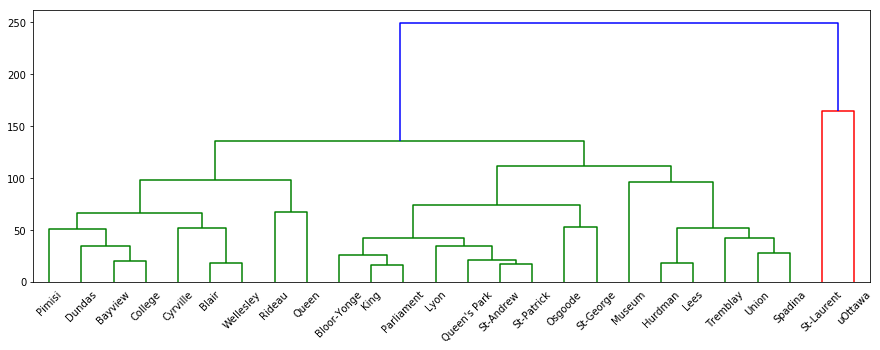

In [39]:
fig = pylab.figure(figsize=(15,5))

dendro = hierarchy.dendrogram(Z, labels = data_000.index)

_Based on the above figure the majority of stations cluster at distances <50. This level would result in eight clusters with only one member. Increasing the cut-off to 100 reduces the number of clusters with only one member to three. Thus we have selected 8 clusters for the final result._

Generate Cluster Labels

In [40]:
agglom = AgglomerativeClustering(n_clusters = 7, linkage = 'complete')
agglom.fit(dist_matrix)
agglom.labels_

C:\DataScience\lib\site-packages\sklearn\cluster\hierarchical.py:471: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([2, 2, 5, 4, 4, 4, 3, 1, 0, 2, 2, 0, 2, 2, 2, 1, 0, 4, 0, 0, 0, 0,
       6, 0, 4, 0], dtype=int64)

Add Cluster To Each Row

In [41]:
results_000 = data_000

results_000['Cluster']=agglom.labels_
results_000.head()

,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport,Cluster
Blair,1.0,1.0,27.0,1.0,4.0,20.0,36.0,10.0,2
Cyrville,2.0,0.0,9.0,2.0,2.0,33.0,40.0,12.0,2
St-Laurent,2.0,1.0,19.0,0.0,1.0,4.0,73.0,1.0,5
Tremblay,2.0,1.0,20.0,0.0,5.0,16.0,25.0,30.0,4
Hurdman,2.0,11.0,15.0,3.0,14.0,16.0,15.0,25.0,4


Examine Members of Each Cluster

In [43]:
results_000.loc[results_000['Cluster'] == 0]

,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport,Cluster
Lyon,1.0,2.0,14.0,2.0,4.0,47.0,12.0,16.0,0
Bloor-Yonge,1.0,3.0,13.0,1.0,3.0,49.0,26.0,4.0,0
King,2.0,1.0,16.0,4.0,4.0,45.0,20.0,8.0,0
St-Andrew,2.0,2.0,20.0,3.0,2.0,50.0,15.0,6.0,0
Osgoode,7.0,1.0,19.0,5.0,9.0,36.0,9.0,15.0,0
St-Patrick,2.0,3.0,26.0,1.0,2.0,46.0,16.0,4.0,0
Queen's Park,2.0,11.0,21.0,1.0,2.0,47.0,14.0,4.0,0
St-George,10.0,21.0,11.0,4.0,4.0,33.0,12.0,6.0,0
Parliament,2.0,0.0,19.0,3.0,4.0,46.0,23.0,3.0,0


In [44]:
results_000.loc[results_000['Cluster'] == 1]

,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport,Cluster
Rideau,2.0,1.0,16.0,6.0,28.0,12.0,30.0,5.0,1
Queen,5.0,0.0,19.0,3.0,2.0,16.0,52.0,4.0,1


In [45]:
results_000.loc[results_000['Cluster'] == 2]

,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport,Cluster
Blair,1.0,1.0,27.0,1.0,4.0,20.0,36.0,10.0,2
Cyrville,2.0,0.0,9.0,2.0,2.0,33.0,40.0,12.0,2
Pimisi,15.0,1.0,22.0,1.0,13.0,19.0,18.0,10.0,2
Bayview,6.0,1.0,16.0,7.0,6.0,26.0,32.0,7.0,2
Wellesley,4.0,1.0,25.0,6.0,3.0,16.0,38.0,7.0,2
College,4.0,2.0,24.0,3.0,4.0,28.0,29.0,7.0,2
Dundas,8.0,3.0,31.0,3.0,5.0,22.0,25.0,3.0,2


In [46]:
results_000.loc[results_000['Cluster'] == 3]

,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport,Cluster
uOttawa,1.0,64.0,8.0,3.0,5.0,10.0,6.0,3.0,3


In [47]:
results_000.loc[results_000['Cluster'] == 4]

,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport,Cluster
Tremblay,2.0,1.0,20.0,0.0,5.0,16.0,25.0,30.0,4
Hurdman,2.0,11.0,15.0,3.0,14.0,16.0,15.0,25.0,4
Lees,3.0,15.0,17.0,3.0,13.0,17.0,12.0,19.0,4
Union,4.0,0.0,26.0,4.0,1.0,19.0,13.0,32.0,4
Spadina,2.0,7.0,14.0,3.0,3.0,24.0,13.0,34.0,4


In [48]:
results_000.loc[results_000['Cluster'] == 5]

,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport,Cluster
St-Laurent,2.0,1.0,19.0,0.0,1.0,4.0,73.0,1.0,5


In [49]:
results_000.loc[results_000['Cluster'] == 6]

,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport,Cluster
Museum,24.0,23.0,9.0,3.0,7.0,22.0,9.0,3.0,6


Output the File

In [50]:
results_000.to_csv('Stations_VenueCounts_Clustered.csv')